In [2]:
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
polars_df = pl.read_csv("../consommation-quotidienne-brute-regionale.csv", separator=";")

Use polars package to fastest loading data.

In [4]:
pandas_df = polars_df.to_pandas()

convert the polars to pandas dataframe.

## Exploring the data

In [5]:
pandas_df.head()

,date_heure,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
0,2013-01-21T09:00:00+01:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,None,4129.0,13610,Définitif,17739.0
1,2013-01-21T09:00:00+01:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,None,4871.0,3589,Définitif,8460.0
2,2013-01-21T09:00:00+01:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,None,17598.0,7306,Définitif,24904.0
3,2013-01-21T09:00:00+01:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0
4,2013-01-21T09:00:00+01:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0


In [6]:
mask = pandas_df['region'].str.contains('Hauts-de-France', case=False, na=False)

In [7]:
hdf_df = pandas_df[mask]

In [8]:
hdf_df["date_heure"] = pd.to_datetime(hdf_df["date_heure"], utc=True)

/var/folders/d0/hykm8r4n4ygf9ms5__0w6f1r0000gn/T/ipykernel_8671/834871651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf_df["date_heure"] = pd.to_datetime(hdf_df["date_heure"], utc=True)


In [9]:
hdf_df['hours'] = hdf_df['date_heure'].dt.hour
hdf_hours = hdf_df.groupby("hours")["consommation_brute_electricite_rte"].sum()
# ----------------------------------------------
hdf_df['days'] = hdf_df['date_heure'].dt.dayofweek
hdf_days = hdf_df.groupby("days")["consommation_brute_electricite_rte"].sum()
# ----------------------------------------------
hdf_df['months'] = hdf_df['date_heure'].dt.month
hdf_months = hdf_df.groupby("months")["consommation_brute_electricite_rte"].sum()
# ----------------------------------------------
hdf_df["quarters"] = hdf_df["date_heure"].dt.quarter
hdf_quarters = hdf_df.groupby("quarters")["consommation_brute_electricite_rte"].sum()


/var/folders/d0/hykm8r4n4ygf9ms5__0w6f1r0000gn/T/ipykernel_8671/4210061722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf_df['hours'] = hdf_df['date_heure'].dt.hour
/var/folders/d0/hykm8r4n4ygf9ms5__0w6f1r0000gn/T/ipykernel_8671/4210061722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf_df['days'] = hdf_df['date_heure'].dt.dayofweek
/var/folders/d0/hykm8r4n4ygf9ms5__0w6f1r0000gn/T/ipykernel_8671/4210061722.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [10]:
hdf_df.set_index("date_heure", inplace=True)

## Question 1

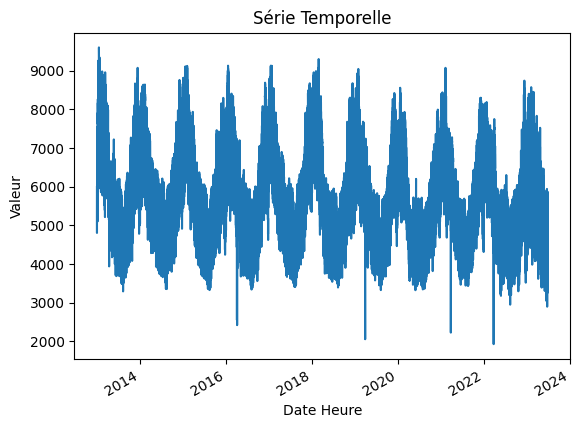

In [11]:
plt.figure()
hdf_df['consommation_brute_electricite_rte'].plot()
plt.xlabel('Date Heure')
plt.ylabel('Valeur')
plt.title('Série Temporelle')
plt.show()

<Axes: xlabel='date_heure'>

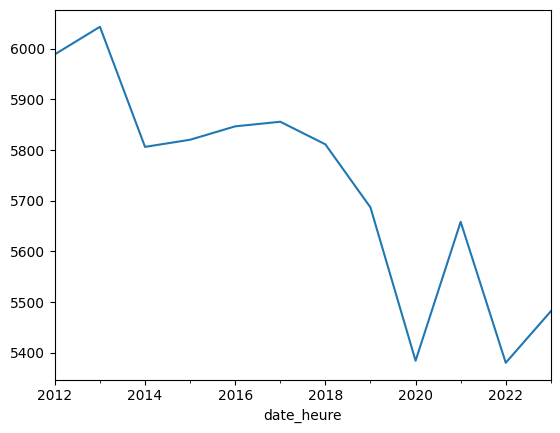

In [12]:
hdf_df["consommation_brute_electricite_rte"].resample('Y').mean().plot()

<Axes: xlabel='date_heure'>

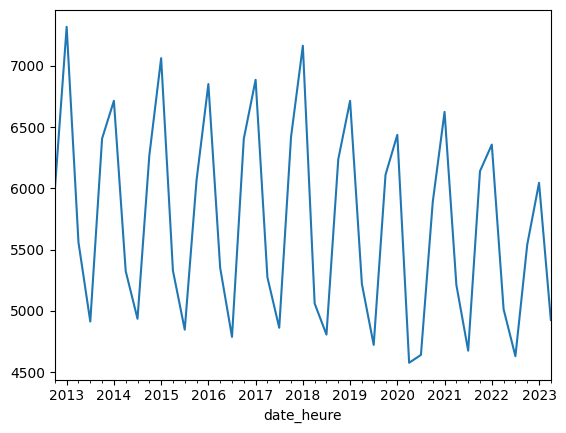

In [13]:
hdf_df["consommation_brute_electricite_rte"].resample('Q').mean().plot()

<Axes: xlabel='date_heure'>

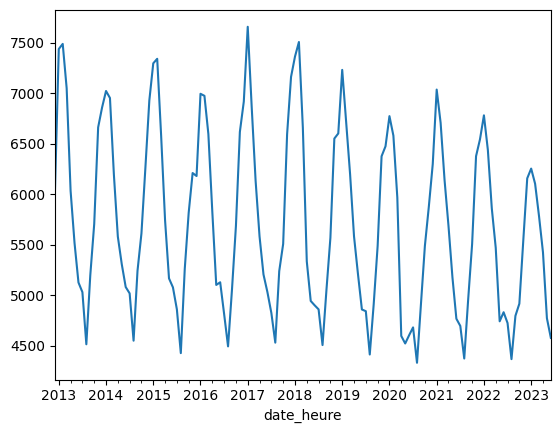

In [14]:
hdf_df["consommation_brute_electricite_rte"].resample('M').mean().plot()

<Axes: xlabel='date_heure'>

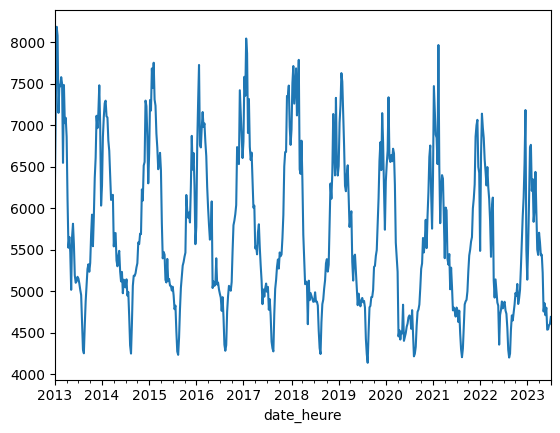

In [15]:
hdf_df["consommation_brute_electricite_rte"].resample('W').mean().plot()

<Axes: xlabel='date_heure'>

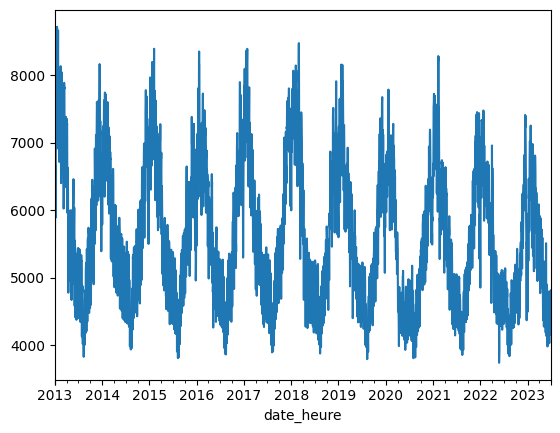

In [16]:
df_day = hdf_df["consommation_brute_electricite_rte"].resample('D').mean()
df_day.plot()

## Question 3

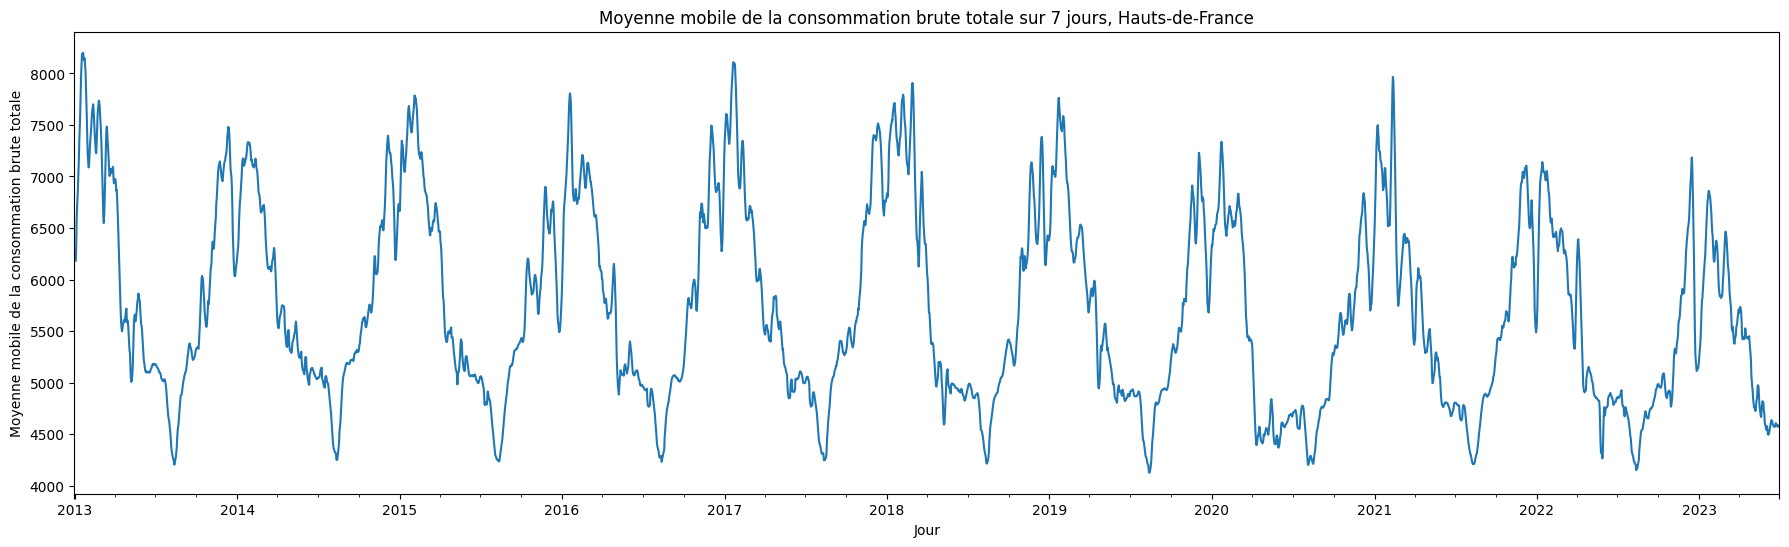

In [17]:
moyenne_mobile = df_day.rolling(window=7, center=True).mean()

plt.figure(figsize=(22, 6))
moyenne_mobile.plot()
plt.xlabel('Jour')
plt.ylabel('Moyenne mobile de la consommation brute totale')
plt.title('Moyenne mobile de la consommation brute totale sur 7 jours, Hauts-de-France')
plt.show()

## Question 4

## Question 5

/Users/ant/.pyenv/versions/3.9.5/envs/venv395/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ant/.pyenv/versions/3.9.5/envs/venv395/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ant/.pyenv/versions/3.9.5/envs/venv395/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Saisonnalité trimestrielle')

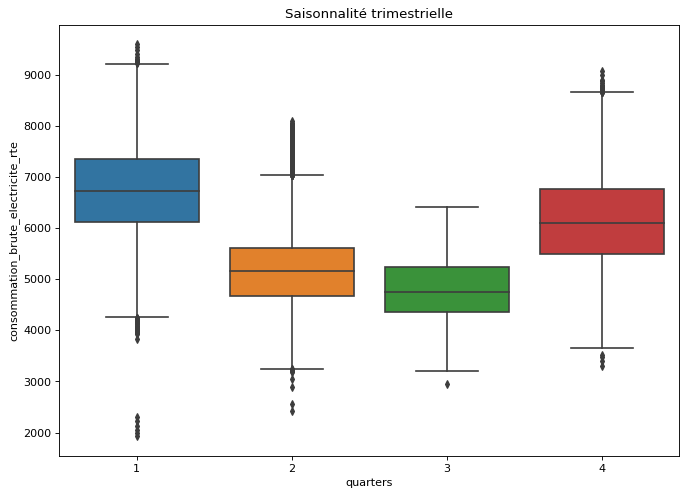

In [18]:
plt.figure(figsize=(10, 7), dpi=80)
sns.boxplot(x='quarters', y='consommation_brute_electricite_rte', data=hdf_df)
plt.title("Saisonnalité trimestrielle")

/Users/ant/.pyenv/versions/3.9.5/envs/venv395/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ant/.pyenv/versions/3.9.5/envs/venv395/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ant/.pyenv/versions/3.9.5/envs/venv395/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Saisonnalité mensuel')

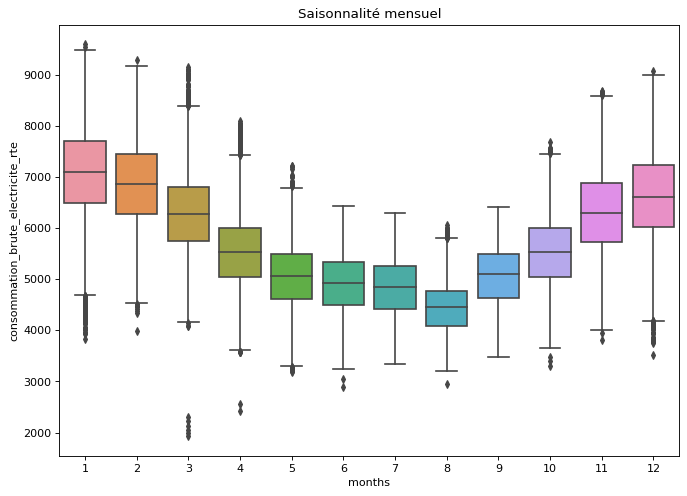

In [19]:
plt.figure(figsize=(10, 7), dpi=80)
sns.boxplot(x='months', y='consommation_brute_electricite_rte', data=hdf_df)
plt.title("Saisonnalité mensuel")

/Users/ant/.pyenv/versions/3.9.5/envs/venv395/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ant/.pyenv/versions/3.9.5/envs/venv395/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ant/.pyenv/versions/3.9.5/envs/venv395/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Saisonnalité hebdomadaire')

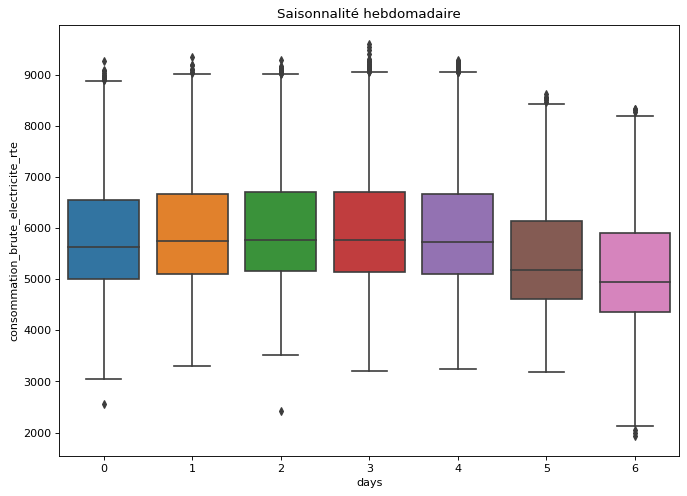

In [20]:
plt.figure(figsize=(10, 7), dpi=80)
sns.boxplot(x='days', y='consommation_brute_electricite_rte', data=hdf_df)
plt.title("Saisonnalité hebdomadaire")

/Users/ant/.pyenv/versions/3.9.5/envs/venv395/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ant/.pyenv/versions/3.9.5/envs/venv395/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ant/.pyenv/versions/3.9.5/envs/venv395/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Saisonnalité journalière')

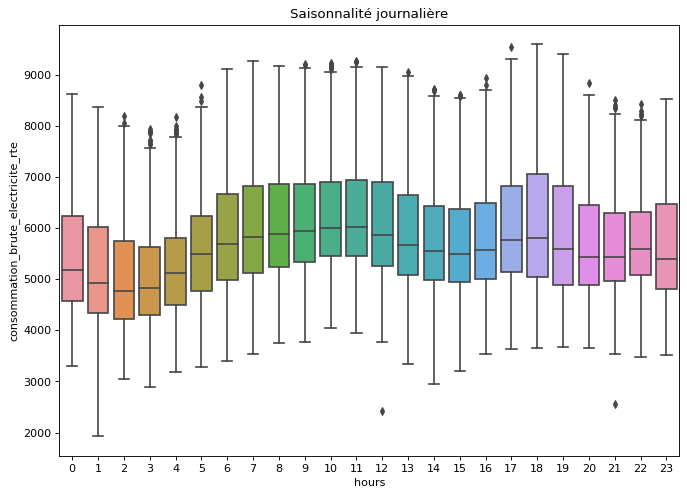

In [21]:
plt.figure(figsize=(10, 7), dpi=80)
sns.boxplot(x='hours', y='consommation_brute_electricite_rte', data=hdf_df)
plt.title("Saisonnalité journalière")

## Question 6

## Question 7

## Question 8

In [22]:
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

result = adfuller(df_day)

# Package qui permet de mettre en forme les résultats proprement
table = [
    ["Test Statistique", "Valeur"],
    ["ADF Statistique", result[0]],
    ["p-value", result[1]],
    ["Conclusion", "La série est stationnaire" if result[1] < 0.05 else "La série n'est pas stationnaire"]
]

print(tabulate(table))

----------------  -------------------------
Test Statistique  Valeur
ADF Statistique   -4.236425652702572
p-value           0.0005713466895179906
Conclusion        La série est stationnaire
----------------  -------------------------


## Question 9

In [23]:
from statsmodels.tsa.stattools import kpss
from tabulate import tabulate

result = kpss(df_day)

table = [
    ["Test Statistique", "Valeur"],
    ["KPSS Statistique", result[0]],
    ["p-value", result[1]],
    ["Conclusion", "La série est stationnaire" if result[1] > 0.05 else "La série n'est pas stationnaire"]
]

# Afficher la table
print(tabulate(table))

----------------  -------------------------------
Test Statistique  Valeur
KPSS Statistique  0.49341650122711683
p-value           0.04314943666055927
Conclusion        La série n'est pas stationnaire
----------------  -------------------------------


## Question 10

In [24]:
from statsmodels.tsa.seasonal import STL

stl = STL(df_day, seasonal=7)
result_stl = stl.fit()
deseasonalized = result_stl.trend + result_stl.resid

<Axes: xlabel='date_heure'>

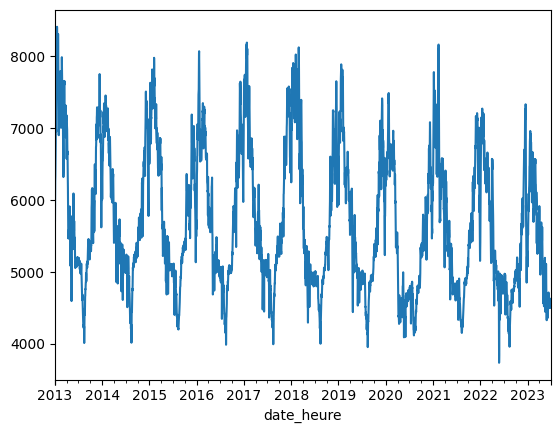

In [25]:
deseasonalized.plot()

In [26]:
deseasonalized.to_csv("deseasonalized.csv")

In [27]:
# Étape 2: Test de Dickey-Fuller sur la série désaisonnalisée
result_adf = adfuller(deseasonalized.dropna())

# Préparation de la table de résultats
table = [
    ["Test Statistique", "Valeur"],
    ["ADF Statistique", result_adf[0]],
    ["p-value", result_adf[1]],
    ["Conclusion", "La série est stationnaire" if result_adf[1] < 0.05 else "La série n'est pas stationnaire"]
]

# Affichage de la table
print(tabulate(table))

----------------  -------------------------
Test Statistique  Valeur
ADF Statistique   -3.9729467930971447
p-value           0.0015589863385872045
Conclusion        La série est stationnaire
----------------  -------------------------


# Partie 3 - ARIMA

In [28]:
from statsmodels.tsa.arima_model import ARIMA

